## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [0]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd
import datetime
import os
from PIL import Image
from random import shuffle

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/dataset/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [8]:
labels = pd.read_csv("/content/labels.csv")
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Print the count of each category of Dogs given in the dataset



In [0]:
breed_count = labels.breed.value_counts()

In [10]:
print(breed_count.head(5))
print("-------------------")
print("Shape: ", breed_count.shape)

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64
-------------------
Shape:  (120,)


In [11]:
print('Total count of dogs: ', labels.shape[0])
print('Number of dog Category: ', len(labels.breed.unique()))

Total count of dogs:  10222
Number of dog Category:  120


In [12]:
print('Count of each category of Dogs:')
labels.groupby('breed').size()

Count of each category of Dogs:


breed
affenpinscher                      80
afghan_hound                      116
african_hunting_dog                86
airedale                          107
american_staffordshire_terrier     74
                                 ... 
welsh_springer_spaniel             79
west_highland_white_terrier        81
whippet                            95
wire-haired_fox_terrier            82
yorkshire_terrier                  82
Length: 120, dtype: int64

### Get one-hot encodings of labels

In [0]:
targets = pd.Series(labels.breed)
onehot = pd.get_dummies(targets, sparse = True)
onehot_labels = np.asarray(onehot)

In [14]:
onehot_labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

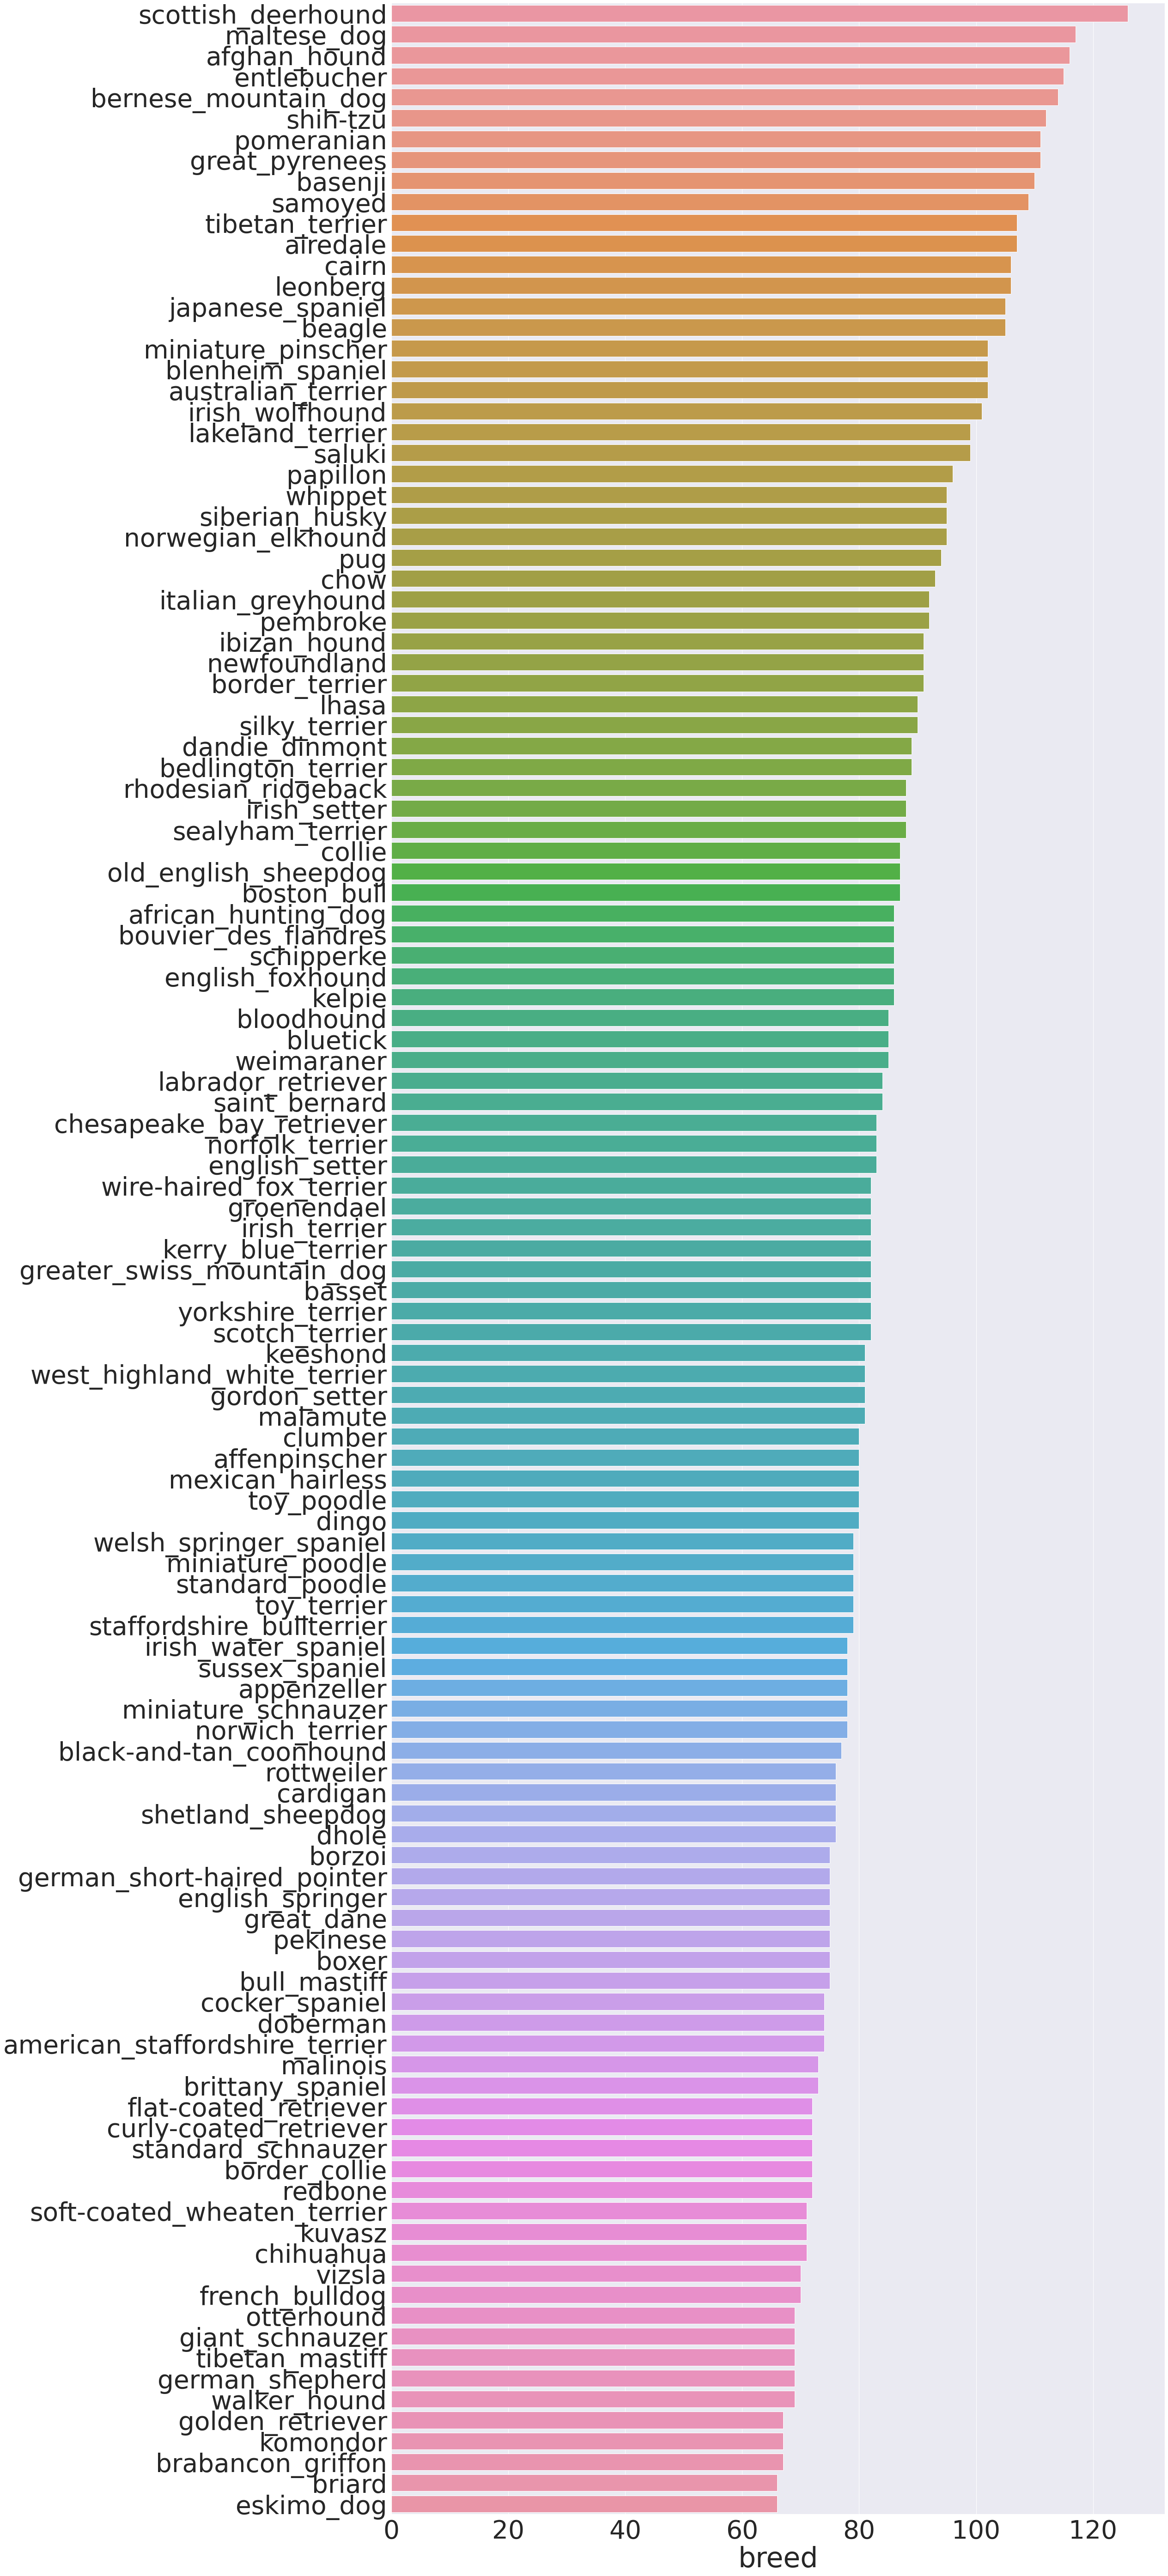

In [15]:
import seaborn as sns

# Horizontal bar plot
plt.figure(figsize=(30,100))
sns.set(style="whitegrid")
sns.set(font_scale=5)
ax = sns.barplot(breed_count,breed_count.index)
plt.show()

**EDA for the given dataset**

1. Above Graph Horizontal will explain the dog breeds unique
2. Total count of dogs:  10222
3. Number of dog Category:  120

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [16]:
from tqdm import tqdm
import cv2


IMG_HEIGHT=128
IMG_WIDTH = 128
#array for resized images
images =[]
#array for labels
classes=[]

#Get Images, resize and assign to images array
for f, img in tqdm(labels.values):
	train_img = cv2.imread('/content/train/{}.jpg'.format(f), 1)
	train_img_resize = cv2.resize(train_img, (IMG_HEIGHT, IMG_WIDTH))
	images.append(train_img_resize)

100%|██████████| 10222/10222 [00:26<00:00, 386.31it/s]


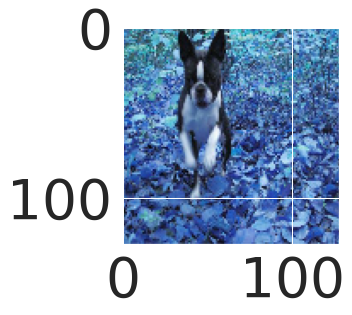

In [17]:
plt.imshow(images[0])

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [18]:
classes = onehot_labels
x_train = np.asarray(images, dtype=np.float32)
y_train = np.asarray(classes, dtype=np.uint8)

print(x_train.shape)
print(y_train.shape)

(10222, 128, 128, 3)
(10222, 120)


### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
from sklearn.model_selection import train_test_split

#train test split takes train and test data and labels. in this case 70% train, 30% test
xtrain, xval, ytrain, yval = train_test_split(x_train, y_train, test_size = 0.3, shuffle = True)

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [20]:
sample = pd.read_csv("/content/sample_submission.csv")
sample.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333

In [21]:
test_img = sample.id
test_img.head(5)

0    000621fb3cbb32d8935728e48679680e
1    00102ee9d8eb90812350685311fe5890
2    0012a730dfa437f5f3613fb75efcd4ce
3    001510bc8570bbeee98c8d80c8a95ec1
4    001a5f3114548acdefa3d4da05474c2e
Name: id, dtype: object

Run the below code to load the test image files in x_test_feature

In [22]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 3)
    img_resize = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:26<00:00, 395.89it/s]


Normalize the test data and convert it into 4 dimensions

In [23]:
x_test = np.asarray(x_test_feature, dtype=np.uint8)
print(x_test.shape)

(10357, 128, 128, 3)


### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization

In [25]:

model = Sequential()

model.add(Conv2D(32, kernel_size = (5, 5), padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(64, kernel_size = (3, 3), padding='same', activation='relu'))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dense(120, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
flatten (Flatten)            (None, 1048576)           0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1048576)           4194304   
_________________________________________________________________
dense (Dense)                (None, 256)               268435712 
_________________________________________________________________
dense_1 (Dense)              (None, 120)               30840     
Total params: 272,681,784
Trainable params: 270,584,632
Non-trainable params: 2,097,152
__________________________________

### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [27]:
model.fit(xtrain, ytrain, batch_size = 128, epochs = 10, verbose = 1)

Epoch 1/10
56/56 [==============================] - 10s 181ms/step - loss: 25.6282 - accuracy: 0.0123
Epoch 2/10
56/56 [==============================] - 9s 168ms/step - loss: 4.7832 - accuracy: 0.0092
Epoch 3/10
56/56 [==============================] - 9s 169ms/step - loss: 4.7804 - accuracy: 0.0120
Epoch 4/10
56/56 [==============================] - 9s 169ms/step - loss: 4.7776 - accuracy: 0.0126
Epoch 5/10
56/56 [==============================] - 9s 169ms/step - loss: 4.7757 - accuracy: 0.0129
Epoch 6/10
56/56 [==============================] - 9s 169ms/step - loss: 4.7733 - accuracy: 0.0133
Epoch 7/10
56/56 [==============================] - 9s 169ms/step - loss: 4.7724 - accuracy: 0.0136
Epoch 8/10
56/56 [==============================] - 9s 169ms/step - loss: 4.7709 - accuracy: 0.0137
Epoch 9/10
56/56 [==============================] - 9s 169ms/step - loss: 4.7687 - accuracy: 0.0137
Epoch 10/10
56/56 [==============================] - 9s 169ms/step - loss: 4.7678 - accuracy: 0.01

In [28]:
score = model.evaluate(xval, yval, verbose = 1)
print(('Validation loss: {0:.2f}%').format(score[0]*100))
print(('Validation accuracy: {0:.2f}%').format(score[1]*100))

96/96 [==============================] - 2s 16ms/step - loss: 5.0324 - accuracy: 0.0140
Validation loss: 503.24%
Validation accuracy: 1.40%


#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [29]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
train_datagen = ImageDataGenerator(featurewise_center=False, 
                                   samplewise_center=False, 
                                   featurewise_std_normalization=False, 
                                   samplewise_std_normalization=False, 
                                   zca_whitening=False, rotation_range=50, 
                                   width_shift_range=0.1, height_shift_range=0.1, 
                                   horizontal_flip=True, 
                                   vertical_flip=False, data_format='channels_last')


In [0]:

valid_datagen = ImageDataGenerator()

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator = train_datagen.flow(xtrain, ytrain, batch_size = 128)
valid_generator = valid_datagen.flow(xval, yval, batch_size = 128)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [33]:
model.fit_generator(train_generator, steps_per_epoch = 255, epochs = 10,                    
                    validation_data = valid_generator, validation_steps = xval.shape[0])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
255/255 [==============================] - 307s 1s/step - loss: 4.7785 - accuracy: 0.0106 - val_loss: 5.3981 - val_accuracy: 0.0143
Epoch 2/10
255/255 [==============================] - 306s 1s/step - loss: 4.7767 - accuracy: 0.0118 - val_loss: 5.6840 - val_accuracy: 0.0085
Epoch 3/10
255/255 [==============================] - 307s 1s/step - loss: 4.7755 - accuracy: 0.0118 - val_loss: 5.6721 - val_accuracy: 0.0085
Epoch 4/10
255/255 [==============================] - 305s 1s/step - loss: 4.7753 - accuracy: 0.0116 - val_loss: 5.8944 - val_accuracy: 0.0078
Epoch 5/10
255/255 [==============================] - 306s 1s/step - loss: 4.7750 - accuracy: 0.0119 - val_loss: 5.5873 - val_accuracy: 0.0085
Epoch 6/10
255/255 [==============================] - 306s 1s/step - loss: 4.7741 - accuracy: 0.0117 - val_loss: 5.6083 - val_accuracy: 0.0085
Epoch 7/10
255/255 [==============================] - 306s 1s/step

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(project_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

Print the summary of the base_model

In [35]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import BatchNormalization,Flatten

In [0]:
modelvgg = base_model.output

modelvgg = BatchNormalization()(modelvgg)
modelvgg = Dropout(0.35)(modelvgg)
modelvgg = Dense(1024, activation='relu')(modelvgg)
modelvgg = Dense(256, activation='relu')(modelvgg)
modelvgg = Dense(256, activation='relu')(modelvgg)
modelvgg = Dropout(0.15)(modelvgg)

predictions = Dense(120, activation='softmax')(modelvgg)

# this is the model we will train
model_t = Model(inputs=base_model.input, outputs=predictions)

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:

for layer in base_model.layers:
    layer.trainable = False

In [0]:
model_t.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')
callbacks = [early_stopping]

In [41]:
history = model_t.fit(xtrain, ytrain, batch_size = 128, epochs = 50, 
                      validation_data = (xval, yval), verbose = 1, callbacks = callbacks)


Epoch 1/50
56/56 [==============================] - 10s 174ms/step - loss: 4.2707 - accuracy: 0.0806 - val_loss: 3.2489 - val_accuracy: 0.2168
Epoch 2/50
56/56 [==============================] - 8s 141ms/step - loss: 2.8827 - accuracy: 0.2815 - val_loss: 2.5329 - val_accuracy: 0.3531
Epoch 3/50
56/56 [==============================] - 8s 140ms/step - loss: 2.3571 - accuracy: 0.3799 - val_loss: 2.3429 - val_accuracy: 0.3942
Epoch 4/50
56/56 [==============================] - 8s 141ms/step - loss: 2.0392 - accuracy: 0.4495 - val_loss: 2.2671 - val_accuracy: 0.4095
Epoch 5/50
56/56 [==============================] - 8s 141ms/step - loss: 1.8114 - accuracy: 0.4942 - val_loss: 2.2028 - val_accuracy: 0.4284
Epoch 6/50
56/56 [==============================] - 8s 140ms/step - loss: 1.6510 - accuracy: 0.5421 - val_loss: 2.2227 - val_accuracy: 0.4271
Epoch 7/50
56/56 [==============================] - 8s 141ms/step - loss: 1.4980 - accuracy: 0.5786 - val_loss: 2.1994 - val_accuracy: 0.4297
Epoch

In [42]:
score_t = model_t.evaluate(xtrain, ytrain, verbose = 1)
print(('Validation loss: {0:.2f}%').format(score_t[0]*100))
print(('Validation accuracy: {0:.2f}%').format(score_t[1]*100))

224/224 [==============================] - 7s 30ms/step - loss: 0.2848 - accuracy: 0.9500
Validation loss: 28.48%
Validation accuracy: 95.00%


In [43]:
history

In [44]:
model.fit_generator(train_generator, steps_per_epoch=255, epochs = 10, 
                    validation_data = valid_generator, validation_steps = 800)

Epoch 1/10
255/255 [==============================] - 154s 604ms/step - loss: 4.7800 - accuracy: 0.0117 - val_loss: 5.5816 - val_accuracy: 0.0081
Epoch 2/10
255/255 [==============================] - 154s 603ms/step - loss: 4.7740 - accuracy: 0.0118 - val_loss: 5.9674 - val_accuracy: 0.0085
Epoch 3/10
255/255 [==============================] - 154s 602ms/step - loss: 4.7741 - accuracy: 0.0118 - val_loss: 5.8351 - val_accuracy: 0.0082
Epoch 4/10
255/255 [==============================] - 155s 607ms/step - loss: 4.7753 - accuracy: 0.0118 - val_loss: 5.6175 - val_accuracy: 0.0081
Epoch 5/10
255/255 [==============================] - 154s 605ms/step - loss: 4.7743 - accuracy: 0.0119 - val_loss: 5.7496 - val_accuracy: 0.0081
Epoch 6/10
255/255 [==============================] - 153s 602ms/step - loss: 4.7744 - accuracy: 0.0115 - val_loss: 5.7012 - val_accuracy: 0.0082
Epoch 7/10
255/255 [==============================] - 153s 601ms/step - loss: 4.7743 - accuracy: 0.0120 - val_loss: 5.7180 -